In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import cv2, PIL, glob, pathlib

In [3]:
cushion = pathlib.Path("../input/natural-diamonds-prices-images/Diamonds/images/cushion")
emerald = pathlib.Path("../input/natural-diamonds-prices-images/Diamonds/images/emerald")
heart = pathlib.Path("../input/natural-diamonds-prices-images/Diamonds/images/heart")
oval = pathlib.Path("../input/natural-diamonds-prices-images/Diamonds/images/oval")
radiant = pathlib.Path("../input/natural-diamonds-prices-images/Diamonds/images/radiant")

In [4]:
images_dict = {
    "cushion" : list(cushion.glob("*.jpg")),
    "emerald" : list(emerald.glob("*.jpg")),
    "heart"   : list(heart.glob("*.jpg")),
    "oval"    : list(oval.glob("*.jpg")),
    "radiant" : list(radiant.glob("*.jpg"))
}
labelsDict = {
    "cushion" : 0,
    "emerald" : 1,
    "heart"   : 2,
    "oval"    : 3,
    "radiant" : 4
}

**Example Image**

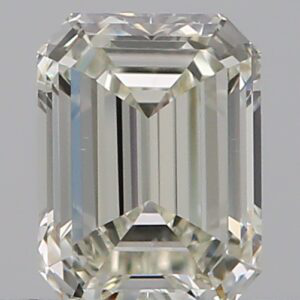

In [5]:
PIL.Image.open(str(images_dict["emerald"][0]))

*This shows the first image of emerald type in our images_dict*

# Preprocessing

In [6]:
X, y = [], []
for label, images in images_dict.items():
    for image in images:
        image = cv2.imread(str(image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if image is not None:
            X.append(image)
            y.append(labelsDict[label])

In [7]:
X = np.array(X)
y = np.array(y)

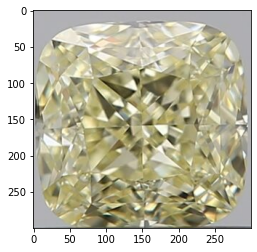

In [8]:
plt.imshow(X[0])
plt.show()

In [9]:
X = X/255

# Model Training

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_train[300].shape

(300, 300, 3)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

**Data Argumentation**

In [13]:
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomContrast(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.7)
])

2021-12-30 13:34:33.465833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 13:34:33.558025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 13:34:33.559097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-30 13:34:33.562606: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
model = keras.Sequential([
    data_argumentation,
    layers.Conv2D(64, (5, 5), padding="same",   input_shape=(300, 300, 3), activation="softmax"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(8, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(50, activation="sigmoid"),
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=200)

2021-12-30 13:34:35.972705: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 852120000 exceeds 10% of free system memory.
2021-12-30 13:34:36.855279: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 852120000 exceeds 10% of free system memory.
2021-12-30 13:34:37.494639: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2021-12-30 13:34:39.827599: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


25/25 [==============================] - 12s 125ms/step - loss: 2.0114 - accuracy: 0.2674
Epoch 2/200
25/25 [==============================] - 3s 104ms/step - loss: 1.4173 - accuracy: 0.3029
Epoch 3/200
25/25 [==============================] - 3s 103ms/step - loss: 1.4160 - accuracy: 0.2763
Epoch 4/200
25/25 [==============================] - 3s 103ms/step - loss: 1.3954 - accuracy: 0.3283
Epoch 5/200
25/25 [==============================] - 3s 103ms/step - loss: 1.4007 - accuracy: 0.3207
Epoch 6/200
25/25 [==============================] - 3s 103ms/step - loss: 1.4066 - accuracy: 0.2839
Epoch 7/200
25/25 [==============================] - 3s 103ms/step - loss: 1.3886 - accuracy: 0.3143
Epoch 8/200
25/25 [==============================] - 3s 105ms/step - loss: 1.3801 - accuracy: 0.3308
Epoch 9/200
25/25 [==============================] - 3s 102ms/step - loss: 1.3403 - accuracy: 0.3688
Epoch 10/200
25/25 [==============================] - 3s 103ms/step - loss: 1.1896 - accuracy: 0.4930


In [15]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 56ms/step - loss: 0.1781 - accuracy: 0.9596


[0.178102508187294, 0.9595959782600403]

In [33]:
answers = ["cushion", 'emerald', "heart", "oval", "radiant"]

**Predictions :**

In [29]:
pred = model.predict(X_test[:10]) # predicting first 10 values
predslist = []
for i in pred:
    predslist.append(np.argmax(i)) # argmax() returns max value of an array

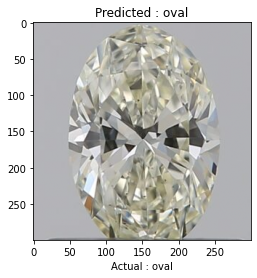

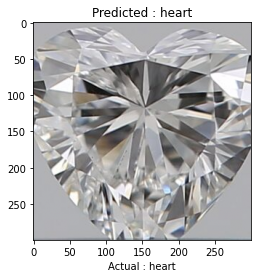

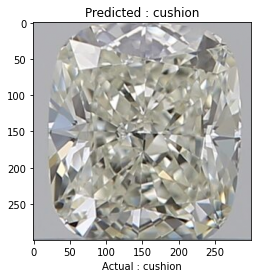

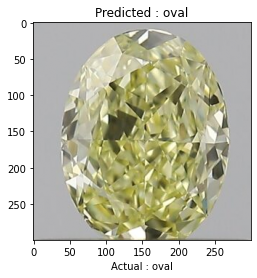

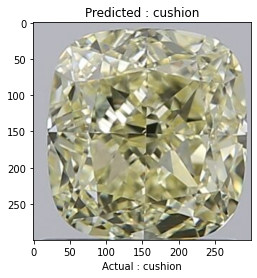

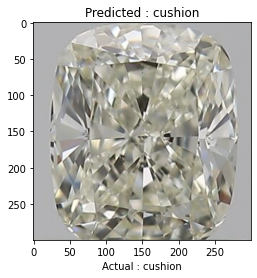

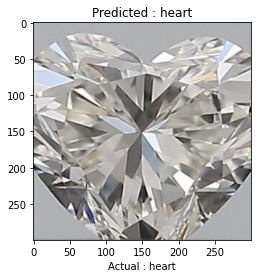

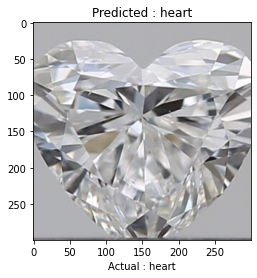

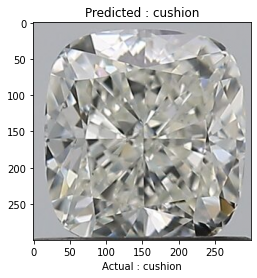

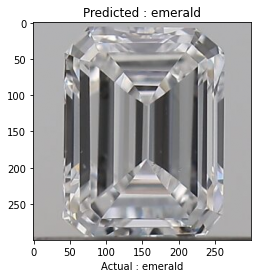

In [40]:
for i in range(10):
    plt.imshow(X_test[i])
    plt.title("Predicted : "+ str(answers[predslist[i]]))
    plt.xlabel("Actual : "+str(answers[y_test[i]]))
    plt.show()

In [26]:
y_test[0]

3

***If you like it please do upvote***